# Customer Crunch – Customer Segmentation using K-Means

In this notebook, we will perform customer segmentation using the K-Means clustering algorithm. The goal is to group customers based on their age, income, and spending habits to derive business insights.

This is useful for identifying high-value customers, budget-conscious shoppers, and more for targeted marketing strategies.


## Step 1: Import Required Libraries

We begin by importing necessary Python libraries for data handling, visualization, and machine learning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


## Step 2: Load the Dataset

We'll load the `Mall_Customers.csv` dataset and preview the first few rows to understand the structure of our data.


In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 3: Rename Columns and Select Features

To simplify column names, we rename them. Then, we select the relevant features (`Age`, `Income`, and `Spending Score`) for clustering.


In [3]:
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

X = df[['Age', 'Income', 'SpendingScore']]


## Step 4: Determine Optimal Number of Clusters – Elbow Method

The elbow method helps us choose the optimal number of clusters by plotting the Within-Cluster Sum of Squares (inertia) for each value of `k`.

We look for the 'elbow point' where inertia starts decreasing slowly.


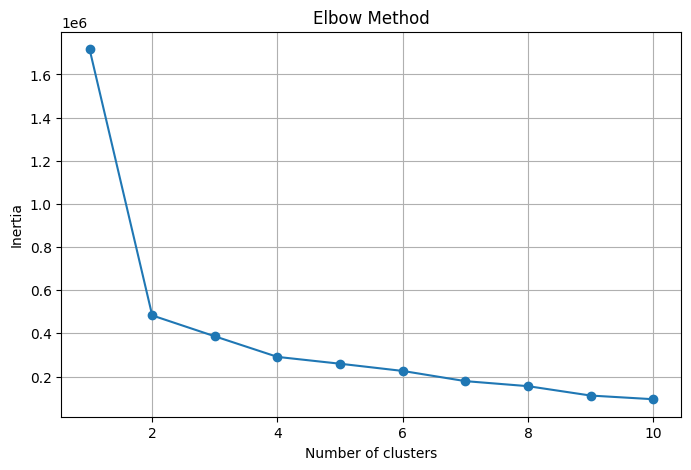

In [4]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


## Step 5: Apply K-Means Clustering

Based on the elbow plot, we choose the optimal number of clusters (e.g., `k=5`) and apply the KMeans algorithm to segment the customers.


In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
df.head()


,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


## Step 6: Analyze Cluster Characteristics

We now explore each cluster by calculating the average `Age`, `Income`, and `Spending Score` per group. This helps understand the behavior of each customer segment.


In [6]:
df.groupby('Cluster')[['Age', 'Income', 'SpendingScore']].mean()


,Age,Income,SpendingScore
Cluster,,,
0,28.829268,59.780488,73.439024
1,31.529412,266.176471,82.000000
2,46.294643,57.535714,33.214286
3,37.086957,164.217391,48.391304
4,42.812500,265.625000,19.500000


## Step 7: Visualize the Customer Segments

We create a scatter plot to visualize the clusters. Each color represents a different group of customers.


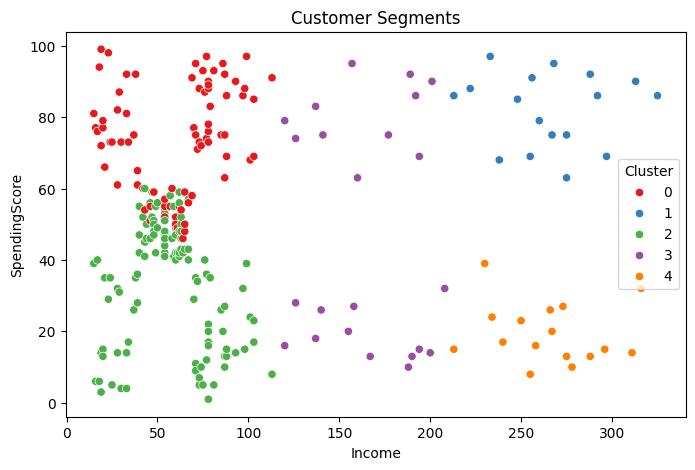

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Income', y='SpendingScore', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()


## Step 8: Export the Final Clustered Data

Finally, we save the clustered dataset into a new CSV file. This file can be used for further reporting, analysis, or integration into business tools.


In [8]:
df.to_csv("Customer_Segments.csv", index=False)
print("Clustered data saved to Customer_Segments.csv")


Clustered data saved to Customer_Segments.csv
